# Target:
# *Broadband Customers 10Mbps (Rs 799) nearing download capacity 3GB + experiencing slowness.*



## Generate a synthetic dataset


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [216]:
def generate_seed_data(n):
    np.random.seed(0)
    
    data = {
        'customer_id': range(1, n+1),
        'package': np.random.choice([10, 50, 100], n),
        'rolling_avg_3month': np.random.uniform(0, 15, n), # usage of the customer
        'num_of_devices': np.random.randint(1, 5, n),
        'complaints_of_slowness_registered': np.random.randint(0, 5, n),
        'region': np.random.choice(['A', 'B', 'C'], n),
        'age': np.random.randint(18, 80, n),
        'num_of_lines': np.random.randint(1, 3, n),
        'phone_model_cost_estimation': np.random.uniform(100, 1000, n),
        'reached_fup_average_in_days': np.random.randint(10, 30, n),
        'last_upgrade': pd.date_range(start='2022-01-01', end='2022-12-31', periods=n)
    }
    
    # Adjust features based on 'rolling_avg_3month'
    
    # Higher rolling average leads to lower reached FUP average
    data['reached_fup_average_in_days'] = np.where(data['rolling_avg_3month'] > 10,
                                                    np.random.randint(10, 20, n),
                                                    np.random.randint(20, 30, n))
    
    
    # Higher rolling average leads to higher complaints, lower age, and higher num_of_devices
    data['complaints_of_slowness_registered'] = np.where(data['rolling_avg_3month'] > 10,
                                                          np.random.randint(3, 6, n),
                                                          np.random.randint(0, 3, n))
    
    data['age'] = np.where(data['rolling_avg_3month'] > 10,
                           np.random.randint(18, 40, n),
                           data['age'])
    
    data['num_of_devices'] = np.where(data['rolling_avg_3month'] > 10,
                                       np.random.randint(3, 6, n),
                                       data['num_of_devices'])
    

    
    return data

In [217]:
# Generate synthetic data
n = 2000
data = generate_seed_data(n)

# Set 'last_upgrade' to null for customers with target variable True
#target_true_indices = np.random.choice(np.arange(n), size=int(n * 0.2), replace=False)
#data['last_upgrade'] = [np.nan if i in target_true_indices else d for i, d in enumerate(data['last_upgrade'])]
    
# Create DataFrame
df = pd.DataFrame(data)

# Adjust 'target_for_upselling' based on conditions
df['target_for_upselling'] = np.where(
    (data['rolling_avg_3month'] > 10) | 
    (data['complaints_of_slowness_registered'] > 2) | 
    (data['reached_fup_average_in_days'] < 12),
    True,
    False
)

# Save data to CSV
df.to_csv('synthetic_data.csv', index=False)

## Preview the first 25 and last 25 elements of the synthetic_data.csv file

In [218]:
# Preview first 25 elements
display(df.head(25))


,customer_id,package,rolling_avg_3month,num_of_devices,complaints_of_slowness_registered,region,age,num_of_lines,phone_model_cost_estimation,reached_fup_average_in_days,last_upgrade,target_for_upselling
0,1,10,5.676051,4,2,B,39,1,803.755976,27,2022-01-01 00:00:00.000000000,False
1,2,50,9.014005,1,0,B,48,1,651.441926,24,2022-01-01 04:22:12.666333166,False
2,3,10,7.037548,4,0,C,36,2,701.846825,29,2022-01-01 08:44:25.332666333,False
3,4,50,10.879743,5,4,C,18,1,371.059235,12,2022-01-01 13:06:37.998999499,True
4,5,50,1.464895,3,0,A,48,2,742.609498,22,2022-01-01 17:28:50.665332666,False
5,6,100,1.762374,1,1,C,46,2,228.747198,23,2022-01-01 21:51:03.331665832,False
6,7,10,12.198353,4,4,A,34,2,302.369165,13,2022-01-02 02:13:15.997998999,True
7,8,100,1.580588,1,0,A,49,2,153.341716,20,2022-01-02 06:35:28.664332166,False
8,9,10,14.467662,3,4,B,23,2,630.041371,14,2022-01-02 10:57:41.330665332,True
9,10,10,10.689592,3,4,A,33,1,168.518937,11,2022-01-02 15:19:53.996998499,True


## Drop these non-numeric columns before computing the correlation matrix

,customer_id,package,rolling_avg_3month,num_of_devices,complaints_of_slowness_registered,region,age,num_of_lines,phone_model_cost_estimation,reached_fup_average_in_days,last_upgrade,target_for_upselling
0,1,10,5.676051,4,2,B,39,1,803.755976,27,2022-01-01 00:00:00.000000000,False
1,2,50,9.014005,1,0,B,48,1,651.441926,24,2022-01-01 04:22:12.666333166,False
2,3,10,7.037548,4,0,C,36,2,701.846825,29,2022-01-01 08:44:25.332666333,False
3,4,50,10.879743,5,4,C,18,1,371.059235,12,2022-01-01 13:06:37.998999499,True
4,5,50,1.464895,3,0,A,48,2,742.609498,22,2022-01-01 17:28:50.665332666,False


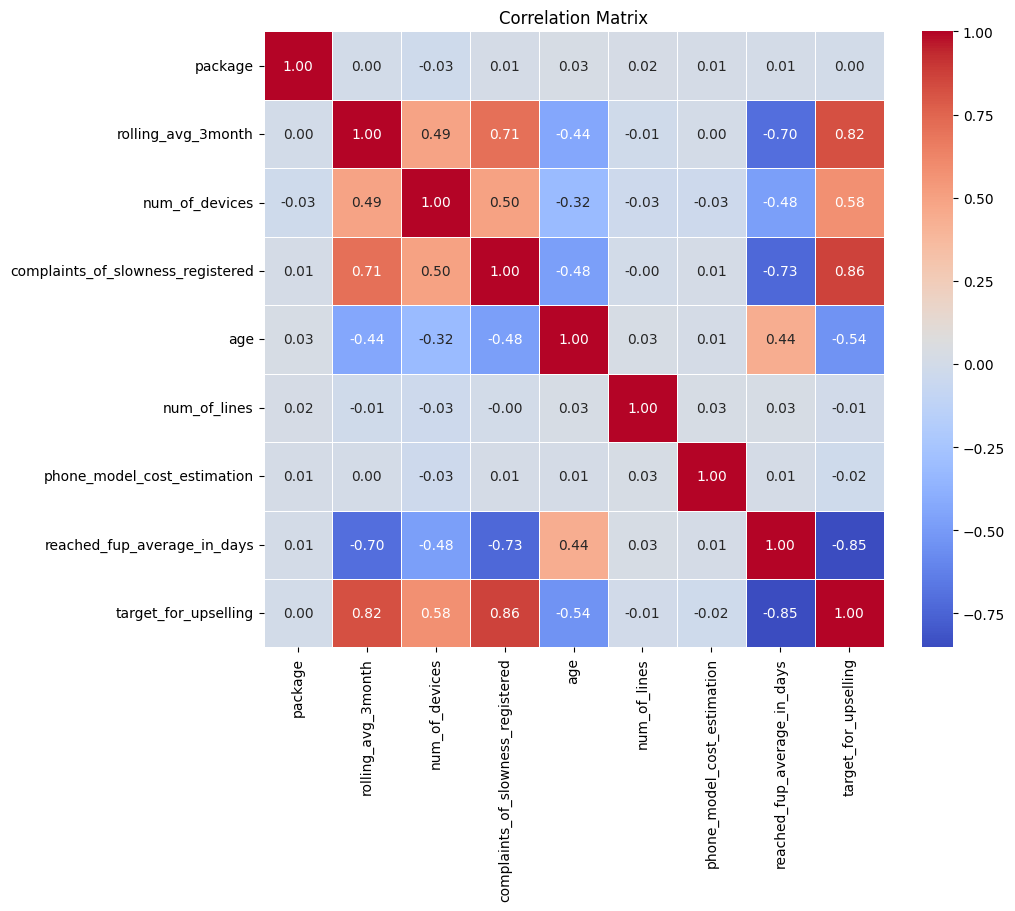

In [219]:
# Drop non-numeric columns
numeric_df = df.drop(['customer_id', 'region', 'last_upgrade'], axis=1)

# Preview first 5 elements
display(df.head(5))

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
    

## Finally, let's implement a basic Random Forest Classifier using scikit-learn



In [220]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['region'])

# Features and target variable
X = df_encoded.drop(['customer_id', 'target_for_upselling', 'last_upgrade'], axis=1)
y = df_encoded['target_for_upselling']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


##  Using Gradient Boosting Classifier 

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)


Gradient Boosting Classifier Accuracy: 1.0


## Some sample data that you can use to test your model 

In [222]:
# Sample data for testing
# Define the number of samples
n = 50

test_data = generate_seed_data(n)

# One-hot encode the 'region' feature and add it to the test_data dictionary
regions = np.random.choice(['A', 'B', 'C'], n)
for region in ['A', 'B', 'C']:
    test_data[f'region_{region}'] = (regions == region).astype(int)

# Set 'last_upgrade' to null for customers with target variable True
target_true_indices = np.random.choice(np.arange(n), size=int(n * 0.2), replace=False)
data['last_upgrade'] = [np.nan if i in target_true_indices else d for i, d in enumerate(data['last_upgrade'])]

test_df = pd.DataFrame(test_data)

# Use Random Forest Classifier to make predictions
rf_predictions = rf_classifier.predict(test_df.drop(['customer_id', 'region', 'last_upgrade'], axis=1))

# Use Gradient Boosting Classifier to make predictions
gb_predictions = gb_classifier.predict(test_df.drop(['customer_id', 'region', 'last_upgrade'], axis=1))

# Add predictions as new columns to the test data DataFrame
test_df['rf_predictions'] = rf_predictions
test_df['gb_predictions'] = gb_predictions

# Display the test data with predictions
display(test_df)

,customer_id,package,rolling_avg_3month,num_of_devices,complaints_of_slowness_registered,region,age,num_of_lines,phone_model_cost_estimation,reached_fup_average_in_days,last_upgrade,region_A,region_B,region_C,rf_predictions,gb_predictions
0,1,10,9.254010,2,2,C,36,1,826.822242,22,2022-01-01 00:00:00.000000000,1,0,0,False,False
1,2,50,14.156221,5,3,A,31,1,772.371523,17,2022-01-08 10:17:08.571428571,0,0,1,True,True
2,3,10,10.227304,3,5,B,36,2,707.362611,18,2022-01-15 20:34:17.142857142,0,1,0,True,True
3,4,50,5.392619,1,0,B,38,2,349.204376,23,2022-01-23 06:51:25.714285714,0,1,0,False,False
4,5,50,6.555479,3,1,B,79,2,257.417987,29,2022-01-30 17:08:34.285714285,0,0,1,False,False
5,6,100,10.464468,4,5,B,25,1,734.026833,17,2022-02-07 03:25:42.857142857,1,0,0,True,True
6,7,10,0.903382,4,2,B,23,1,516.835180,26,2022-02-14 13:42:51.428571428,1,0,0,False,False
7,8,100,10.001501,5,3,C,32,2,856.385679,15,2022-02-21 23:59:59.999999999,0,1,0,True,True
8,9,10,10.059568,5,5,C,21,2,284.379186,13,2022-03-01 10:17:08.571428571,0,1,0,True,True
9,10,10,3.155738,3,0,C,62,2,248.462981,23,2022-03-08 20:34:17.142857142,0,0,1,False,False
